In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Welcome to JupyROOT 6.26/02


In [2]:
inFile_k100 = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files/Gd_test/k100sim_Gd_nCap_test.root'
file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

save_ = False
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05)

### livetime : 21.8 seconds for 50 M events

In [3]:
livetime = 9.6 * (21.8/50)
print ("Total livetime = ",livetime,"seconds")

Total livetime =  4.1856 seconds


In [4]:
# From k100sim
EV = tree_k100["EV"].array(library="np")
P = tree_k100["P"].array(library="np")
Type = tree_k100["Type"].array(library="np")
DT = tree_k100["DT"].array(library="np")
TS = tree_k100["TS"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
X1 = tree_k100["X1"].array(library="np")
Y1 = tree_k100["Y1"].array(library="np")
Z1 = tree_k100["Z1"].array(library="np")
X3 = tree_k100["X3"].array(library="np")
Y3 = tree_k100["Y3"].array(library="np")
Z3 = tree_k100["Z3"].array(library="np")
time1 = tree_k100["time1"].array(library="np")
time3 = tree_k100["time3"].array(library="np")
nCap = tree_k100["nCap"].array(library="np")

# canvas
c = rt.TCanvas("c","c",800,600)

In [34]:
h_k100sim_Nphotons_all = rt.TH1F("h_Nphotons_all","Number of photons from k100Sim",50,0,50)
h_pdgid_parent = rt.TH1F("h_pdgid","PDGID of parent particle",3000,0,3000)

h_parent_energy_log10 = rt.TH1F("h_parent_energy_log10","Energy of neutrons",150,-10,5)
h_parent_energy_log10.GetXaxis().SetTitle("log10(Parent Energy [MeV])")

h_parent_energy_log10_inSi = rt.TH1F("h_parent_energy_log10_inSi","Energy of neutrons traversing silicon",150,-10,5)
h_parent_energy_log10_inSi.GetXaxis().SetTitle("log10(Parent Energy [MeV])")

h_parent_energy_log10_on_nCap = rt.TH1F("h_parent_energy_log10_on_nCap","Energy of neutrons on nCap",150,-10,5)
h_parent_energy_log10_on_nCap.GetXaxis().SetTitle("log10(Parent Energy [MeV])")

h_energy_neutron_nCap = rt.TH1F("h_energy_neutron_nCap","Energy of neutrons for nCap",150,0,1.5)
h_energy_neutron_nCap.GetXaxis().SetTitle("Energy [eV]")

h_Edep_neutron = rt.TH1F("h_Edep_neutron","Energy deposited by neutrons before nCap",150,-10,5)
h_Edep_neutron.GetXaxis().SetTitle("log10(Neutron Edep [MeV])")

h_neutron_x_y = rt.TH2F("h_neutron_x_y","Position of neutrons registered in detector",120,-60,60,120,-60,60)
h_neutron_x_y.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y.GetYaxis().SetTitle("y [mm]")



h_neutron_x_y_nCap = rt.TH2F("h_neutron_x_y_nCap","Position of neutron captures registered in Si crystal",120,-60,60,120,-60,60)
h_neutron_x_y_nCap.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_nCap.GetYaxis().SetTitle("y [mm]")

h_neutron_x_y_z_nCap = rt.TH3F("h_neutron_x_y_z_nCap","Position of neutron captures registered in Si crystal",120,-60,60,120,-60,60,60,10.0, 70.0)
h_neutron_x_y_z_nCap.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_z_nCap.GetYaxis().SetTitle("y [mm]")
h_neutron_x_y_z_nCap.GetYaxis().SetTitle("z [mm]")


h_neutron_x = rt.TH1F("h_neutron_x","X position of neutrons registered in the detector",120,-60,60)
h_neutron_x.GetXaxis().SetTitle("x [mm]")

h_neutron_y = rt.TH1F("h_neutron_y","y position of neutrons registered in the detector",120,-60,60)
h_neutron_y.GetXaxis().SetTitle("y [mm]")

h_neutron_z = rt.TH1F("h_neutron_z","Z position of neutrons registered in the detector",600, 10.0, 70.0)
h_neutron_z.GetXaxis().SetTitle("z [mm]")

h_neutron_dR_nCap = rt.TH1F("h_neutron_dR_nCap","dR(preSetp, postStep) for neutron capture",200, 0.0, 200.0)
h_neutron_dR_nCap.GetXaxis().SetTitle("dR [mm]")

h_photon_energy_nCapInGd = rt.TH1F("h_photon_energy_nCapInGd","Energy of photons produced on nCap in Gd as per Geant4",150,0,15)
h_photon_energy_nCapInGd.GetXaxis().SetTitle("Energy [MeV]")

h_energy_gamma_nCap_Si = rt.TH1F("h_energy_gamma_nCap_Si","Energy of gammas on nCap Si",500,0,10)
h_energy_gamma_nCap_Si.GetXaxis().SetTitle("Energy [MeV]")

h_energySum_gamma_nCap_Si = rt.TH1F("h_energySum_gamma_nCap_Si","EnergySum of gammas on nCap Si",1000,0,50)
h_energySum_gamma_nCap_Si.GetXaxis().SetTitle("Energy [MeV]")

h_nGammas_nCap_Si = rt.TH1F("h_nGammas_nCap_Si","Nb of gammas on nCap in Si",20,0,20)
h_nGammas_nCap_Si.GetXaxis().SetTitle("Nb of gammas")


total_capture_events = 0
capture_in_si = 0
capture_in_Gd = 0
events_with_no_neutron = []
events_with_neutron = []
events_with_nCap_in_Gd = []
events_with_nCap_in_Si = []
debug_count = 0
for i in tqdm(range(len(EV))):
    tracks = TS[i]/100000
    tracks = tracks.astype('int32')
    neutron_tracks = tracks[Type[i] == 2112]
    neutron_parents = P[i][Type[i] == 2112]
    
    #neutron_tracks = neutron_tracks[neutron_parents == 0]
    
    
    if(len(neutron_tracks) == 0): # No neutron in the event
        events_with_no_neutron.append(i)
        continue
        
    unique_tracks, indices = np.unique(neutron_tracks, return_index=True)
    
#     if(len(unique_tracks) !=1): # Sanity check
#         print("More than one unique tracks for event = ",i)
#         break
    
    events_with_neutron.append(i) 
    neutron_energy = E1[i][Type[i] == 2112]
    neutron_parents = P[i][Type[i] == 2112]
#     if(len(neutron_energy[neutron_parents == 0]) == 0):
#         continue
    neutron_DT = DT[i][Type[i] == 2112]
    neutron_D3 = D3[i][Type[i] == 2112]
    
    neutron_X1 = X1[i][Type[i] == 2112]
    neutron_Y1 = Y1[i][Type[i] == 2112]
    neutron_Z1 = Z1[i][Type[i] == 2112]
    neutron_X3 = X3[i][Type[i] == 2112]
    neutron_Y3 = Y3[i][Type[i] == 2112]
    neutron_Z3 = Z3[i][Type[i] == 2112]
    neutron_capture = nCap[i][Type[i] == 2112]
    neutron_tracks = TS[i][Type[i] == 2112]
    
    parent_neutron_en = (neutron_energy)[0]
    parent_neutron_X3 = (neutron_X3)[0]
    parent_neutron_Y3 = (neutron_Y3)[0]
    parent_neutron_Z3 = (neutron_Z3)[0]
    parent_neutron_DT = (neutron_DT)[0]
    
    h_parent_energy_log10.Fill(np.log10(parent_neutron_en)) # Use first neutron resgiterd in Si
    h_neutron_x_y.Fill(parent_neutron_X3,parent_neutron_Y3)
    h_neutron_x.Fill(parent_neutron_X3)
    h_neutron_y.Fill(parent_neutron_Y3)
    h_neutron_z.Fill(parent_neutron_Z3)
    
    if(parent_neutron_DT == 1):
        h_parent_energy_log10_inSi.Fill(np.log10(parent_neutron_en))
    
    nCap_Si_neutron_track = -1
    nCap_Si = False
    for i_ncap in (np.where(neutron_capture == 1))[0]:
        Edep_ncap = neutron_D3[i_ncap]
        if(Edep_ncap > 0.):
            print("non zero Edep %f on nCap by neutron for event = %d"%(Edep_ncap,i))
#         if(np.sum(neutron_D3) > )
        total_capture_events += 1
#         h_parent_energy_log10_on_nCap.Fill(np.log10(neutron_energy[i_ncap]))
#         h_energy_neutron_nCap.Fill(neutron_energy[i_ncap]*1.e6)
        dx = neutron_X3[i_ncap] - neutron_X1[i_ncap]
        dy = neutron_Y3[i_ncap] - neutron_Y1[i_ncap]
        dz = neutron_Z3[i_ncap] - neutron_Z1[i_ncap]
        h_Edep_neutron.Fill(np.sum(neutron_D3))
        h_neutron_dR_nCap.Fill(np.sqrt(dx*dx + dy*dy + dz*dz))
        if(neutron_DT[i_ncap] == 1):
            capture_in_si += 1
            h_neutron_x_y_nCap.Fill(neutron_X3[i_ncap],neutron_Y3[i_ncap])
            h_neutron_x_y_z_nCap.Fill(neutron_X3[i_ncap],neutron_Y3[i_ncap],neutron_Z3[i_ncap])
            h_parent_energy_log10_on_nCap.Fill(np.log10(neutron_energy[i_ncap]))
            h_energy_neutron_nCap.Fill(neutron_energy[i_ncap]*1.e6)
            events_with_nCap_in_Si.append(i)
            nCap_Si = True
            nCap_Si_neutron_track = int(neutron_tracks[i_ncap]/100000)*100000
        else:
            capture_in_Gd += 1
            events_with_nCap_in_Gd.append(i)
    
    if(nCap_Si):
        esum_gammas = 0.
        n_gammas = 0
        
        for j,capture in enumerate(nCap[i]):
            track_temp = int(TS[i][j]/100000)*100000
            step_temp = TS[i][j] - (track_temp)
            if(P[i][j] == nCap_Si_neutron_track and step_temp == 1):
                if(Type[i][j] == 22):
                    h_energy_gamma_nCap_Si.Fill(E1[i][j])
                    esum_gammas += E1[i][j]
                    n_gammas += 1
        
        h_nGammas_nCap_Si.Fill(n_gammas)
        h_energySum_gamma_nCap_Si.Fill(esum_gammas)
        if(debug_count < 10 and n_gammas >= 9):
            print("%d photons, %f MeV Edep for event %d"%(n_gammas, esum_gammas, i))
            debug_count += 1
    
                
    
        
print ("Total events = %d"%(len(EV)))
print ("Events with no registered neutrons in detector = %d"%(len(events_with_no_neutron)))
print ("Events with registered neutrons in Gd+Si = %d"%(len(events_with_neutron)))
#print (events_with_no_neutron)
print ("Neutrons registered in Silicon = %d"%(h_parent_energy_log10_inSi.GetEntries()))
print ("Neutrons registered in Gd = %d"%(len(events_with_neutron) - h_parent_energy_log10_inSi.GetEntries()))
print ("Total neutron capture events = %d out of %d events."%(total_capture_events,len(events_with_neutron)))
print ("Total neutron capture events in Si = %d out of %d events."%(capture_in_si,total_capture_events))
print ("Total neutron capture events in Gd = %d out of %d events."%(capture_in_Gd,total_capture_events))


#     for j,parent in enumerate(P[i]):
#         if(parent == 0):
#             h_pdgid_parent.Fill(Type[i][j])
#             h_parent_energy_log10.Fill(np.log10(E1[i][j]))
#             h_neutron_x_y.Fill(X1[i][j],Y1[i][j])
#             h_neutron_x.Fill(X1[i][j])
#             h_neutron_y.Fill(Y1[i][j])
#             h_neutron_z.Fill(Z1[i][j])
#             if(nCap[i][j] == 1):
#                 h_parent_energy_log10_on_nCap.Fill(np.log10(E1[i][j]))
#                 h_energy_neutron_nCap.Fill(E1[i][j]*1.e6)

#                 #print (E1[i][j]*1.e6)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26932/26932 [00:00<00:00, 54854.21it/s]


Total events = 26932
Events with no registered neutrons in detector = 13293
Events with registered neutrons in Gd+Si = 13639
Neutrons registered in Silicon = 23
Neutrons registered in Gd = 13616
Total neutron capture events = 7355 out of 13639 events.
Total neutron capture events in Si = 0 out of 7355 events.
Total neutron capture events in Gd = 7355 out of 7355 events.


Warning in <TROOT::Append>: Replacing existing TH1: h_Nphotons_all (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pdgid (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_parent_energy_log10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_parent_energy_log10_inSi (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_parent_energy_log10_on_nCap (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_energy_neutron_nCap (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Edep_neutron (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_neutron_x_y (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_neutron_x_y_nCap (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_neutron_x_y_z_nCap (Potential memory leak).
Warning in <TROOT::Append>: Replacing

In [6]:
nCap_Gd_rate = float(capture_in_Gd)/livetime
nCap_Si_rate = float(capture_in_si)/livetime
print ("nCap rate in Gd = %0.2f Hz"%(nCap_Gd_rate))
print ("nCap rate in Si = %0.2f Hz"%(nCap_Si_rate))

nCap rate in NaI = 1757.22 Hz
nCap rate in Si = 0.00 Hz


In [7]:
events_with_nCap_in_Gd
line = ""
for i,j in enumerate(events_with_nCap_in_Si):
    line += "%d, "%(j)
    if(i%15 == 0):
        line += "\n"
print (line)
# i = 89
# #events_with_nCap_in_Si[0]
# print(nCap[i])
# print(DT[i])
# print(E1[i])

In [35]:
events_with_nCap_in_Gd

[6,
 7,
 9,
 19,
 21,
 26,
 27,
 29,
 32,
 39,
 40,
 42,
 51,
 52,
 55,
 62,
 63,
 70,
 71,
 72,
 79,
 81,
 88,
 89,
 93,
 94,
 99,
 100,
 101,
 103,
 104,
 109,
 111,
 112,
 116,
 122,
 128,
 141,
 152,
 159,
 161,
 162,
 163,
 166,
 167,
 168,
 169,
 175,
 176,
 180,
 181,
 182,
 183,
 187,
 189,
 193,
 194,
 195,
 196,
 197,
 199,
 201,
 203,
 208,
 210,
 213,
 216,
 220,
 228,
 229,
 235,
 238,
 239,
 246,
 259,
 268,
 269,
 271,
 274,
 276,
 277,
 278,
 282,
 284,
 290,
 293,
 302,
 305,
 307,
 308,
 311,
 314,
 315,
 317,
 323,
 325,
 329,
 330,
 336,
 338,
 344,
 349,
 353,
 357,
 361,
 363,
 364,
 375,
 377,
 379,
 387,
 389,
 392,
 393,
 394,
 397,
 405,
 406,
 408,
 409,
 410,
 417,
 418,
 423,
 425,
 429,
 432,
 433,
 434,
 436,
 437,
 438,
 444,
 446,
 448,
 452,
 455,
 457,
 467,
 468,
 470,
 488,
 493,
 495,
 496,
 497,
 502,
 503,
 513,
 514,
 515,
 519,
 521,
 522,
 529,
 539,
 541,
 542,
 545,
 554,
 555,
 556,
 557,
 558,
 560,
 561,
 562,
 563,
 564,
 565,
 569,
 571

In [ ]:
#%jsroot on
h_parent_energy_log10_inSi.Draw()
h_parent_energy_log10_on_nCap.SetLineColor(rt.kRed)
h_parent_energy_log10_on_nCap.SetLineWidth(2)
h_parent_energy_log10_on_nCap.SetLineStyle(2)
h_parent_energy_log10_on_nCap.Draw("sames")
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("EnergyNeutronOverlay_100k.png")

In [ ]:
h_Edep_neutron.Draw()

c.Draw()

In [ ]:
h_energy_neutron_nCap.Scale(1.0/h_energy_neutron_nCap.Integral())
h_energy_neutron_nCap.GetYaxis().SetTitle("Normalized to unity area")
h_energy_neutron_nCap.Draw("hist")
rt.gPad.SetLogy()
c.Draw()

In [ ]:
# nbins = h_energy_neutron_nCap.GetNbinsX()
# totalBinContent = 0
# for i in range(nbins+1):
#     if(i == 0):
#         continue
#     normalizedBinContent = h_energy_neutron_nCap.GetBinContent(i)/h_energy_neutron_nCap.Integral()
    
#     print("%0.9f %0.3f "%((h_energy_neutron_nCap.GetBinCenter(i)*1e-6),normalizedBinContent))
#     totalBinContent += normalizedBinContent

# print("----------")
# print(totalBinContent)

In [ ]:

#h_pdgid_parent.Draw()
rt.gPad.SetLogy(0)

#h_neutron_x_y.Draw("colz")
h_neutron_x_y_nCap.SetLineColor(rt.kRed)
h_neutron_x_y_nCap.SetLineWidth(3)

h_neutron_x_y_nCap.Draw("box ")


c.Draw()
if(save_):
    c.SaveAs("NCap_pos_in_Si.png")

In [ ]:
rt.gPad.SetLogy(0)
h_neutron_x_y_z_nCap.Draw("box")
c.Draw()
if(save_):
    c.SaveAs("neutron_capture_si_3D_100k.png")

In [ ]:
h_neutron_dR_nCap.Draw()
rt.gPad.SetLogy()
c.Draw()

In [ ]:
h_neutron_x.Draw()
rt.gPad.SetLogy()
c.Draw()

In [ ]:
h_neutron_y.Draw()
c.Draw()

In [ ]:
h_neutron_z.Draw()
c.Draw()

In [ ]:
h_nGammas_nCap_Si.Draw()
c.Draw()

In [ ]:
h_energy_gamma_nCap_Si.Draw()
rt.gPad.SetLogy()
c.Draw()


In [ ]:
h_energySum_gamma_nCap_Si.Draw()
rt.gPad.SetLogy()
c.Draw()


In [ ]:
def data_for_cylinder_along_z(center_x,center_y,radius,z_center,height_z):
    z = np.linspace(z_center - height_z/2, z_center + height_z/2, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in tqdm(range(len(EV))):
    for j,capture in enumerate(nCap[i]):
        if(capture == 1):
            if(DT[i][j] == 1):
                ax.scatter(X3[i][j], Y3[i][j], Z3[i][j],marker="o",c="r")
            else:
                ax.scatter(X3[i][j], Y3[i][j], Z3[i][j],marker="o",c="g")
            #X1[i][j] = X1[i][j]

# Draw detector crystal
Xc,Yc,Zc = data_for_cylinder_along_z(0.0,0.0,50.0,20.0 + 33.3/2,33.3)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
ax.set_xlabel('X1 [mm]')
ax.set_ylabel('Y1 [mm]')
ax.set_zlabel('Z1 [mm]')
fig.suptitle("Neutron capture position", fontsize=16)
#ax.view_init(elev=30, azim=60)
plt.show()

In [8]:
for i in events_with_nCap_in_Gd:
    tracks = TS[i]/100000
    # #type(tracks)
    ncap_index = (np.where(nCap[i] == 1))[0][0]
    tracks = tracks.astype('int32')
    parent_track = tracks[ncap_index]*100000
    parent_type = Type[i][ncap_index]
    photon_tracks = tracks[Type[i] == 22]
    photon_energy = E1[i][Type[i] == 22]
    photon_parents = P[i][Type[i] == 22]    
    photon_DT = DT[i][Type[i] == 22]
    unique_tracks, indices = np.unique(photon_tracks, return_index=True)
    photon_parents = photon_parents[indices]
    #parent_type = Type[i][indices]
    photon_DT = photon_DT[indices]
    #print (photon_energy[indices])
#     print (parent_track)
#     print (parent_type)
#     print (photon_parents)
    #break
    for energy in photon_energy[indices]:
        h_photon_energy_nCapInGd.Fill(energy)

In [ ]:
h_photon_energy_nCapInGd.Draw()
rt.gPad.SetLogy()

c.Draw()

## Background study in Gd

In [1]:
#background study

h_k100sim_bkg_si_Edep = rt.TH1F("h_k100sim_bkg_si_Edep","Energy deposited in Si on non-nCap events",500,0,50)
h_k100sim_bkg_si_Edep.GetXaxis().SetTitle("Energy [MeV]")

h_k100sim_bkg_si_Edep_withTimeCut = rt.TH1F("h_k100sim_bkg_si_Edep_withTimeCut","Energy deposited in Si on non-nCap events < 1ms",500,0,50)
h_k100sim_bkg_si_Edep_withTimeCut.GetXaxis().SetTitle("Energy [MeV]")

h_k100sim_bkg_Gd_Edep = rt.TH1F("h_k100sim_bkg_Gd_Edep","Energy deposited in Gd on non-nCap events",500,0,50)
h_k100sim_bkg_Gd_Edep.GetXaxis().SetTitle("Energy [MeV]")

h_k100sim_bkg_Gd_Edep_withTimeCut = rt.TH1F("h_k100sim_bkg_Gd_Edep_withTimeCut","Energy deposited in Gd on non-nCap events  < 1ms",500,0,50)
h_k100sim_bkg_Gd_Edep_withTimeCut.GetXaxis().SetTitle("Energy [MeV]")

h_k100sim_bkg_Gd_Edep_GdNcap = rt.TH1F("h_k100sim_bkg_Gd_Edep_GdNcap","Energy deposited in Gd on non-nCap events (Ncap in Gd)",500,0,50)
h_k100sim_bkg_Gd_Edep_GdNcap.GetXaxis().SetTitle("Energy [MeV]")

h_tile_multiplicity = rt.TH1F("h_tile_multiplicity","Numbers of tiles with non-zero Edep",25,0,25)
h_tile_multiplicity.GetXaxis().SetTitle("Multiplicity")

h_tile_energy = rt.TH1F("h_tile_energy","Edep in individual tiles",2500,0,50)
h_tile_energy.GetXaxis().SetTitle("Energy [MeV]")

h_neutron_Gd = rt.TH1F("h_neutron_Gd","Energy of neutrons flux in Gd",1500,-10,5)
h_neutron_Gd.GetXaxis().SetTitle("log10(Neutron [MeV])")

h_neutron_Gd_nCap = rt.TH1F("h_neutron_Gd","Energy of neutrons flux in Gd on nCap",1500,-10,5)
h_neutron_Gd_nCap.GetXaxis().SetTitle("log10(Neutron [MeV])")

h_edep_Gd_time = rt.TH1F("h_edep_Gd_time","time3",355,-0.5,35)
h_edep_Gd_time.GetXaxis().SetTitle("log10(time3 [ns])")


h_k100sim_bkg_Gd_Edep_withTimeCut_vs_tile_multiplicity = rt.TH2F("h_k100sim_bkg_Gd_Edep_withTimeCut_vs_tile_multiplicity","Gd Edep vs multiplicity",500,0,50,25,0,25)
h_k100sim_bkg_Gd_Edep_withTimeCut_vs_tile_multiplicity.GetXaxis().SetTitle("Energy [MeV]")
h_k100sim_bkg_Gd_Edep_withTimeCut_vs_tile_multiplicity.GetYaxis().SetTitle("Multiplicity")


debug_count = 0
Edep_tiles = np.zeros(23)

total_event_count = 0
event_count_3_10MeV = 0
total_event_count_in_trig_window = 0
ncap_Gd_event_count_in_trig_window = 0

neutron_in_Gd = 0
neutron_in_Gd_nCap = 0

events_with_Gd_Edep_10MeV_or_more = []

for i in tqdm(range(len(EV))):
#     if(i > 100000):
#         break
    ncap_si = False
    edep_si = 0.
    edep_Gd = 0.
    edep_si_tCut = 0.
    edep_Gd_tCut = 0.
    ncap_Gd = False
    Edep_tiles_temp = np.zeros(23)
    neutron_energy = 0.
    neutron_energy_nCap = 0.
    
#     tracks = TS[i]/100000
#     tracks = tracks.astype('int32')
#     neutron_tracks = tracks[(Type[i] == 2112)]
#     neutron_energy = E1[i][Type[i] == 2112]
#     neutron_DT = DT[i][Type[i] == 2112]
#     neutron_capture = nCap[i][Type[i] == 2112]
#     unique_tracks, indices = np.unique(neutron_tracks, return_index=True)
    
#     neutron_energy = neutron_energy[indices]
#     neutron_capture = neutron_capture[indices]
#     neutron_tracks = neutron_tracks[indices]
    
    first_step_in_detector = True
    TS_debug = -1
    for j,capture in enumerate(nCap[i]):
        if(capture == True and DT[i][j] == 1):
            ncap_si = True
            break
        if(Type[i][j] == 2112 and DT[i][j] != 1 and first_step_in_detector):
            neutron_energy = E1[i][j]
            TS_debug = TS[i][j]
            first_step_in_detector = False
            
#             track = int(TS[i][j]/100000)
#             step = TS[i][j] - track
#             if(step == 1):
#                 neutron_energy = E1[i][j]
                
        if(capture == True and DT[i][j] != 1):
            ncap_Gd = True
#             if(TS[i][j] != TS_debug):
#                 print("something is worng with neuton in Gd @ event %d"%(i))
#                 sys.exit(0)
            if(Type[i][j] != 2112):
                print("Neutron capture without neutron?? Check event = %d"%(i))
                sys.exit()
            else:
                neutron_energy_nCap = E1[i][j]
            
        if(DT[i][j] == 1):
            edep_si += D3[i][j]
            if(time3[i][j] < 1.e6 or True):
                edep_si_tCut += D3[i][j]
        else:
            edep_Gd += D3[i][j]
            h_edep_Gd_time.Fill(np.log10(time3[i][j]))
            if(time3[i][j] < 1.e6 or True):
                edep_Gd_tCut += D3[i][j]
                if(DT[i][j] > 2000): # vertical tiles : 2001 - 2020
                    Edep_tiles_temp[DT[i][j] - 2000 - 1] += D3[i][j]
                else: # horizontal tiles : 1001 - 1003
                    Edep_tiles_temp[DT[i][j] - 1000 - 1 + 20] += D3[i][j]
                
    if(ncap_si):
        continue
    
    h_k100sim_bkg_si_Edep.Fill(edep_si)
    h_k100sim_bkg_Gd_Edep.Fill(edep_Gd)
    h_k100sim_bkg_si_Edep_withTimeCut.Fill(edep_si_tCut)
    if(edep_Gd_tCut > 0.):
        h_k100sim_bkg_Gd_Edep_withTimeCut.Fill(edep_Gd_tCut)
        if(ncap_Gd):
            h_k100sim_bkg_Gd_Edep_GdNcap.Fill(edep_Gd_tCut)
        
    Edep_tiles += Edep_tiles_temp
    
    
    
    n_tiles = np.count_nonzero(Edep_tiles_temp)
    h_tile_multiplicity.Fill(n_tiles)
    h_k100sim_bkg_Gd_Edep_withTimeCut_vs_tile_multiplicity.Fill(edep_Gd_tCut,n_tiles)
    
    tile_10MeV_veto = False
    energy_in_trig_window = 0.  # This is the energy sum of panels with energies between 3 and 10 MeV each panel
    for j,energy in enumerate(Edep_tiles_temp):
        h_tile_energy.Fill(energy)
        if(energy > 10.):
            tile_10MeV_veto = True
        if(energy > 3. and energy < 10. ):
            energy_in_trig_window += energy
    
    if(edep_Gd > 0.):
        total_event_count += 1
        
    if(energy_in_trig_window > .0):
        event_count_3_10MeV += 1
        if(not tile_10MeV_veto):
            total_event_count_in_trig_window += 1
            if(ncap_Gd):
                ncap_Gd_event_count_in_trig_window += 1
    
    if(neutron_energy > 0.):
        h_neutron_Gd.Fill(np.log10(neutron_energy))
        neutron_in_Gd += 1
    if(neutron_energy_nCap > 0.):
        h_neutron_Gd_nCap.Fill(np.log10(neutron_energy_nCap))
        neutron_in_Gd_nCap += 1
        

       
    if(edep_Gd > 10.):
        events_with_Gd_Edep_10MeV_or_more.append(i)
        if(debug_count < 10):
            print("event number with Edep_Gd > 10 MeV = %d, nCap-Gd? %d"%(i,ncap_Gd))
            debug_count += 1
    if(edep_Gd_tCut > 1. and debug_count < 2 and False):
        for j,energy in enumerate(Edep_tiles_temp):
            print ("Tile : Edep :: %d : %f"%(j,energy))
        print("Event : total esum :: %d : %f "%(i,edep_Gd_tCut))
        debug_count += 1


print ("Events with neutrons passing through Gd = %d"%(neutron_in_Gd))
print ("Events with neutrons passing through Gd and nCap = %d"%(neutron_in_Gd_nCap))
print ("nCap in Gd event fraction = %0.2f%%"%(100*neutron_in_Gd_nCap/neutron_in_Gd))
print ("Total event count with Edep Gd > 0. = %d"%(total_event_count))
print ("Total Event count between 3 and 10 MeV = %d"%(event_count_3_10MeV))

print ("Total Event count for (3 < Edep <  10 MeV) && (Edep_tile < 10 MeV) = %d"%(total_event_count_in_trig_window))
print ("Ncap-in-Gd Event count for (3 < Edep <  10 MeV) && (Edep_tile < 10 MeV) = %d"%(ncap_Gd_event_count_in_trig_window))

NameError: name 'rt' is not defined

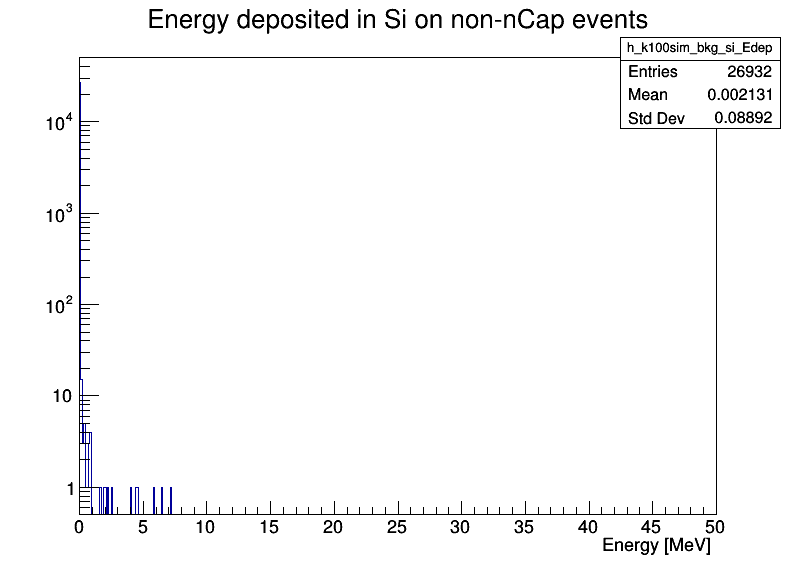

In [10]:
#%jsroot on
rt.gPad.SetLogy()
h_k100sim_bkg_si_Edep.Draw()
c.Draw()
if(save_):
    c.SaveAs("./background_study/h_k100sim_bkg_si_Edep.png")

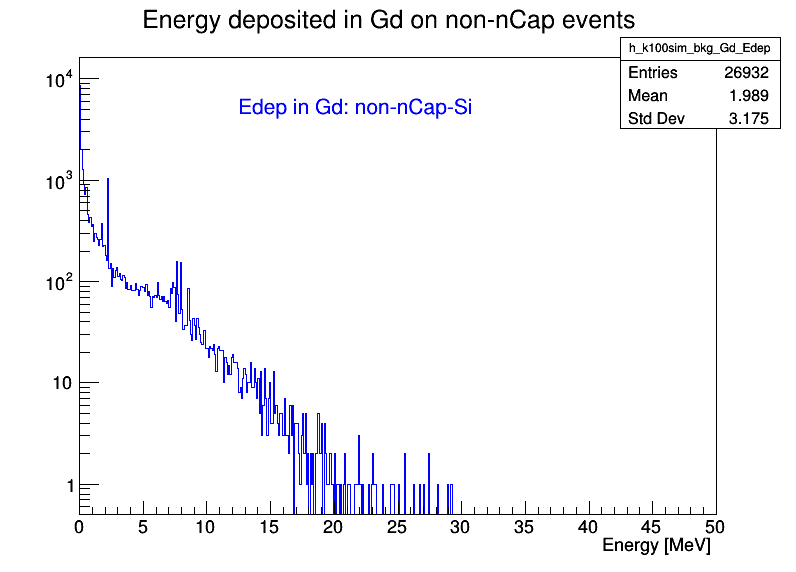

In [12]:
h_k100sim_bkg_Gd_Edep.SetLineColor(rt.kBlue)
h_k100sim_bkg_Gd_Edep.Draw()
textOnTop.SetTextSize(0.04)
textOnTop.SetTextColor(rt.kBlue)
textOnTop.DrawLatexNDC(0.3,0.8,"#bf{Edep in Gd: non-nCap-Si}")
c.Draw()

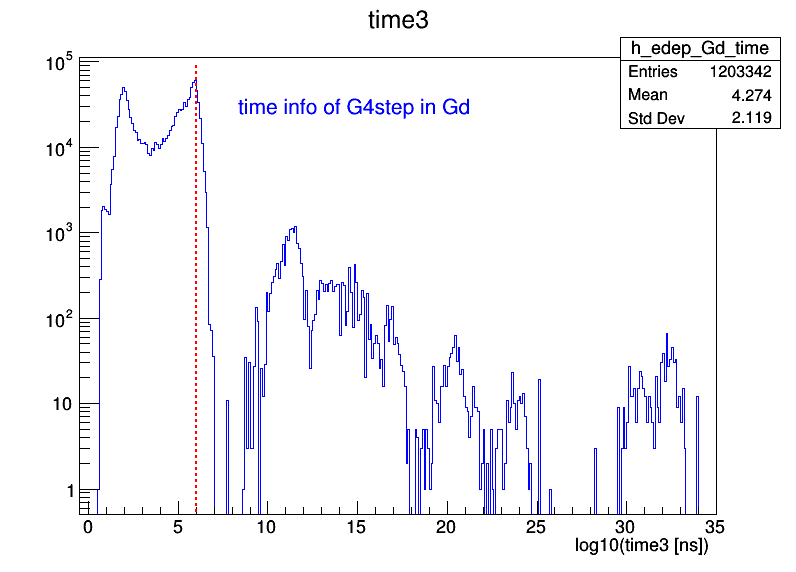

In [13]:
h_edep_Gd_time.SetLineColor(rt.kBlue)
h_edep_Gd_time.Draw()
textOnTop.SetTextSize(0.04)
textOnTop.SetTextColor(rt.kBlue)
textOnTop.DrawLatexNDC(0.3,0.8,"#bf{time info of G4step in Gd}")
line = rt.TLine(6,0,6,h_edep_Gd_time.GetMaximum()*1.5)
line.SetLineColor(rt.kRed)
line.SetLineStyle(2)
line.SetLineWidth(2)
line.Draw()
c.Draw()

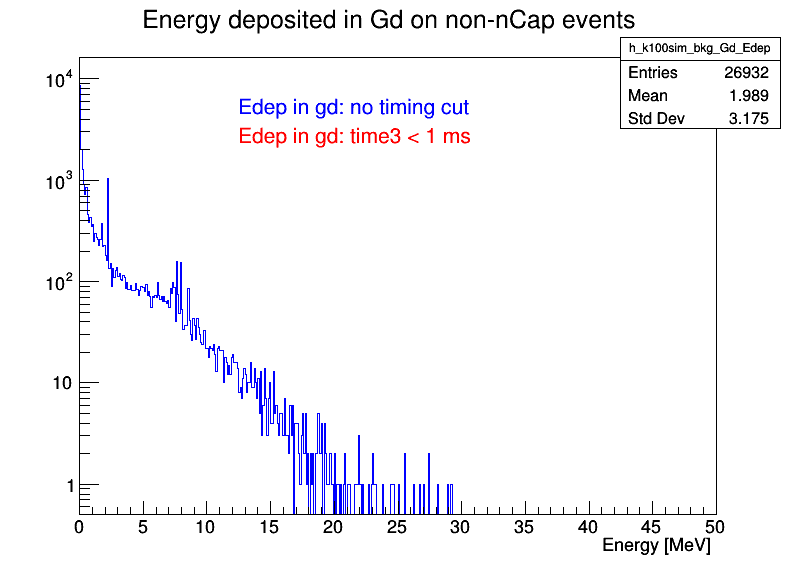

In [14]:
h_k100sim_bkg_Gd_Edep.SetLineColor(rt.kBlue)
h_k100sim_bkg_Gd_Edep.Draw()
h_k100sim_bkg_Gd_Edep_withTimeCut.SetLineColor(rt.kRed)
h_k100sim_bkg_Gd_Edep_withTimeCut.SetLineStyle(2)
h_k100sim_bkg_Gd_Edep_withTimeCut.SetLineWidth(2)
#h_k100sim_bkg_Gd_Edep_withTimeCut.Draw("sames")
textOnTop.SetTextSize(0.04)
textOnTop.SetTextColor(rt.kBlue)
textOnTop.DrawLatexNDC(0.3,0.8,"#bf{Edep in gd: no timing cut}")
textOnTop.SetTextColor(rt.kRed)
textOnTop.DrawLatexNDC(0.3,0.75,"#bf{Edep in gd: time3 < 1 ms}")
c.Draw()
if(save_):
    c.SaveAs("./background_study/h_k100sim_bkg_Gd_Edep_with_withoutTime_cut.png")


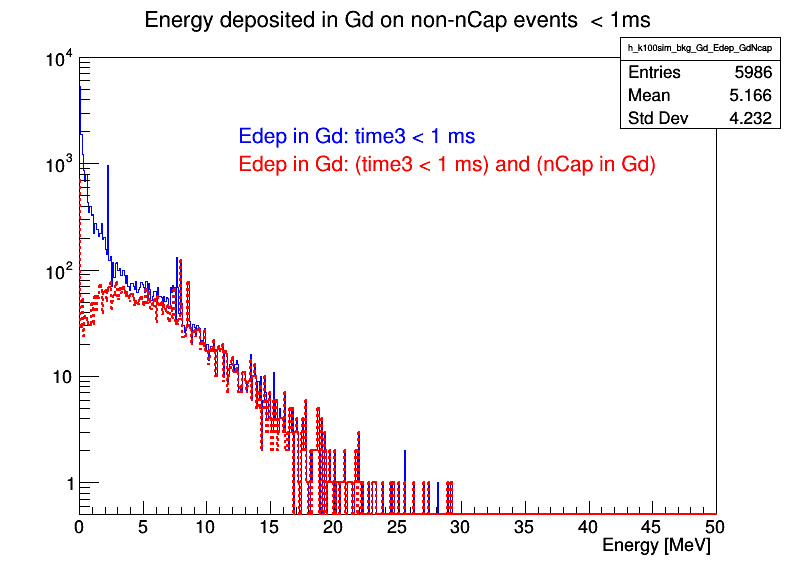

In [15]:
rt.gPad.SetLogy()
h_k100sim_bkg_Gd_Edep_withTimeCut.SetLineColor(rt.kBlue)
h_k100sim_bkg_Gd_Edep_withTimeCut.SetLineStyle(1)
h_k100sim_bkg_Gd_Edep_withTimeCut.SetLineWidth(1)
h_k100sim_bkg_Gd_Edep_withTimeCut.Draw()
h_k100sim_bkg_Gd_Edep_GdNcap.SetLineColor(rt.kRed)
h_k100sim_bkg_Gd_Edep_GdNcap.SetLineStyle(2)
h_k100sim_bkg_Gd_Edep_GdNcap.SetLineWidth(2)
h_k100sim_bkg_Gd_Edep_GdNcap.Draw("sames")


textOnTop.SetTextColor(rt.kBlue)
textOnTop.DrawLatexNDC(0.3,0.75,"#bf{Edep in Gd: time3 < 1 ms}")
textOnTop.SetTextColor(rt.kRed)
textOnTop.DrawLatexNDC(0.3,0.70,"#bf{Edep in Gd: (time3 < 1 ms) and (nCap in Gd)}")

c.Draw()
if(save_):
    c.SaveAs("./background_study/h_k100sim_bkg_Gd_Edep_comparison_nCapInGd.png")


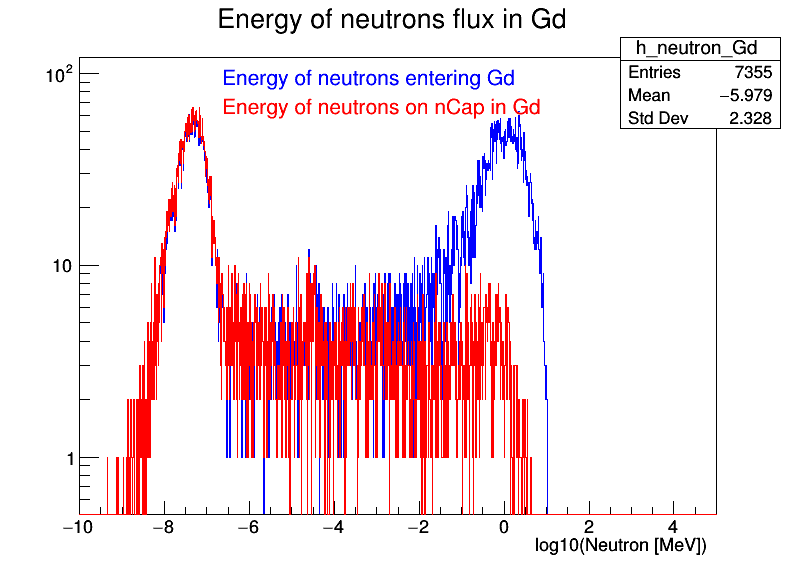

In [16]:
h_neutron_Gd.SetLineColor(rt.kBlue)
h_neutron_Gd.SetLineStyle(1)
h_neutron_Gd.SetLineWidth(1)
h_neutron_Gd.Draw()
h_neutron_Gd_nCap.SetLineColor(rt.kRed)
h_neutron_Gd_nCap.SetLineStyle(1)
h_neutron_Gd_nCap.SetLineWidth(1)
h_neutron_Gd_nCap.Draw("sames")

textOnTop.SetTextSize(0.04)
textOnTop.SetTextColor(rt.kBlue)
textOnTop.DrawLatexNDC(0.28,0.85,"#bf{Energy of neutrons entering Gd}")
textOnTop.SetTextColor(rt.kRed)
textOnTop.DrawLatexNDC(0.28,0.80,"#bf{Energy of neutrons on nCap in Gd}")

c.Draw()
if(save_):
    c.SaveAs("./background_study/Gd/h_neutron_Gd_and_nCap_comparison.png")


In [ ]:
outFile = rt.TFile("outFile.root","recreate")
outFile.cd()
h_neutron_Gd.Write()
h_neutron_Gd_nCap.Write()
outFile.Close()

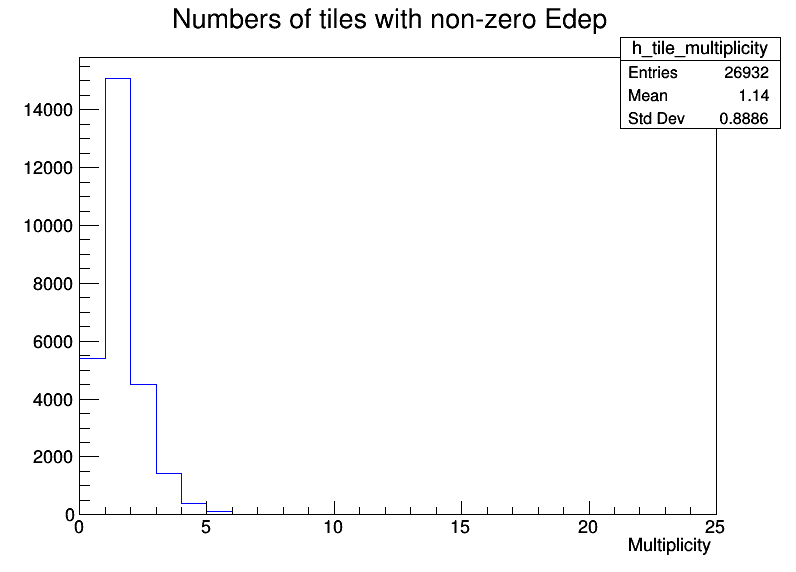

In [17]:
h_tile_multiplicity.SetLineColor(rt.kBlue)
h_tile_multiplicity.Draw()
rt.gPad.SetLogy(0)
c.Draw()
if(save_):
    c.SaveAs("./background_study/h_tile_multiplicity.png")


python ERROR: cannot open image file "./background_study/h_Edep_vs_multi.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file ./background_study/h_Edep_vs_multi.png


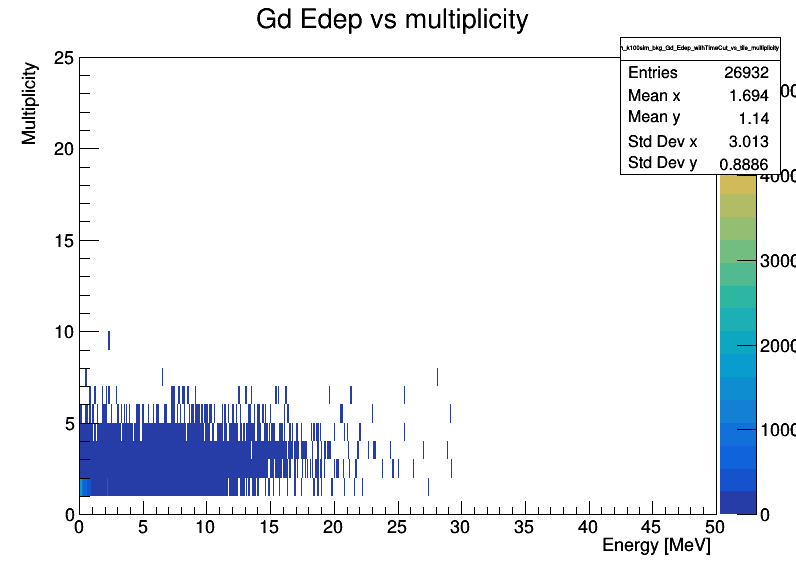

In [18]:
h_k100sim_bkg_Gd_Edep_withTimeCut_vs_tile_multiplicity.Draw("colz")
rt.gPad.SetLogy(0)
c.Draw()
c.SaveAs("./background_study/h_Edep_vs_multi.png")

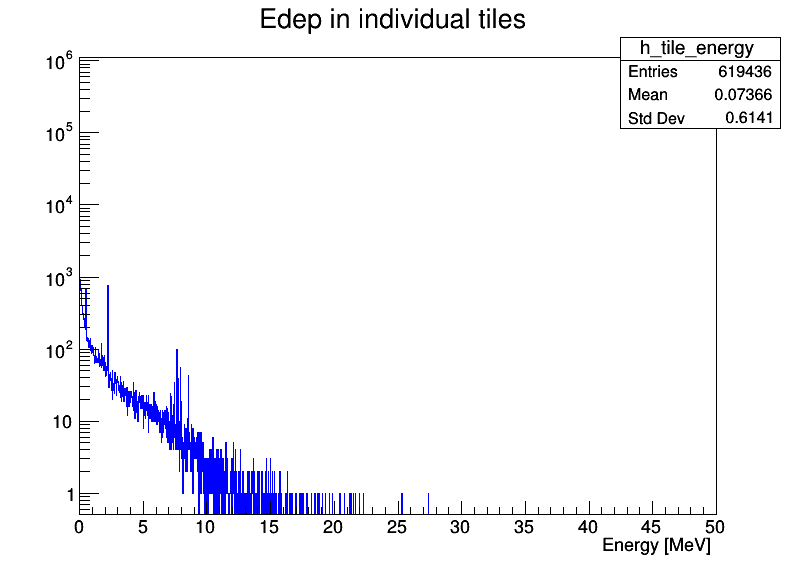

In [19]:
h_tile_energy.SetLineColor(rt.kBlue)
h_tile_energy.Draw()
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("./background_study/h_tile_energy.png")

## For Debug

In [ ]:
events_with_nCap_in_Gd


In [20]:
i = 6
total_D3 = 0.0
for j in range(len(TS[i])):
    if(D3[i][j] > 0 or True):
        print("i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: %d : %d : %d : %d : %0.2f : %0.2f : %0.2f : %d : %0.3f : %0.3f : %d : %d"%(j,Type[i][j],TS[i][j],P[i][j],X1[i][j],Y1[i][j],Z1[i][j],DT[i][j],E1[i][j],D3[i][j],time3[i][j],nCap[i][j]))
        total_D3 += D3[i][j]


   
tracks = TS[i]/100000
tracks = tracks.astype('int32')
neutron_tracks = tracks[Type[i] == 2112]
neutron_parents = P[i][Type[i] == 2112]
#neutron_tracks = neutron_tracks[neutron_parents == 0]
neutron_energy = E1[i][Type[i] == 2112]
neutron_DT = DT[i][Type[i] == 2112]

neutron_X1 = X1[i][Type[i] == 2112]
neutron_Y1 = Y1[i][Type[i] == 2112]
neutron_Z1 = Z1[i][Type[i] == 2112]
neutron_capture = nCap[i][Type[i] == 2112]

unique_tracks, indices = np.unique(neutron_tracks, return_index=True)

neutron_energy = neutron_energy[indices]
neutron_X1 = neutron_X1[indices]
neutron_Y1 = neutron_Y1[indices]
neutron_Z1 = neutron_Z1[indices]
neutron_capture = neutron_capture[indices]

print(Type[i])
print(P[i])
print(D3[i])
print(neutron_capture)
print(neutron_energy)
print("Total energy deposit = %f"%(total_D3))

i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 0 : 2112 : 100065 : 0 : -440.77 : -46.41 : 437.15 : 2005 : 0.000 : 0.000 : 1453929 : 1
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 1 : 158064 : 5800001 : 100000 : -440.77 : -46.42 : 437.15 : 2005 : 0.000 : 0.000 : 1453930 : 0
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 2 : 158064 : 5800002 : 100000 : -440.77 : -46.42 : 437.15 : 2005 : 0.000 : 0.000 : 1453930 : 0
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 3 : 22 : 5700001 : 100000 : -440.77 : -46.42 : 437.15 : 2005 : 1.080 : 0.000 : 1453930 : 0
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 4 : 22 : 5700002 : 100000 : -439.40 : -45.37 : 437.62 : 2005 : 0.388 : 0.000 : 1453930 : 0
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 5 : 22 : 5700004 : 100000 : -438.57 : -27.79 : 414.00 : 2006 : 0.388 : 0.000 : 1453930 : 0
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 6 : 22 : 5700005 : 100000 : -438.31 : -22.21 : 406.50 : 2006 : 0.388 : 0.000 : 1453930 : 0
i:Type:TS:P:X:Y:Z:DT:E1:D3:GT:nCap :: 7 : 22 : 5700006 : 100000 : -438.44 : -19.18 : 402.01 :

In [36]:


debug_count = 0

h_energy_gamma_nCap_Gd = rt.TH1F("h_energy_gamma_nCap_Gd","Energy of gammas on nCap Gd",500,0,10)
h_energy_gamma_nCap_Gd.GetXaxis().SetTitle("Energy [MeV]")

h_energySum_gamma_nCap_Gd = rt.TH1F("h_energySum_gamma_nCap_Gd","EnergySum of gammas on nCap Gd",1000,0,50)
h_energySum_gamma_nCap_Gd.GetXaxis().SetTitle("Energy [MeV]")

h_energy_other_nCap_Gd = rt.TH1F("h_energy_other_nCap_Gd","Energy of all other PIDs on nCap Gd",1000,0,50)
h_energy_other_nCap_Gd.GetXaxis().SetTitle("Energy [MeV]")

h_energySum_other_nCap_Gd = rt.TH1F("h_energySum_other_nCap_Gd","Energy of all other PIDs on nCap Gd",1000,0,50)
h_energySum_other_nCap_Gd.GetXaxis().SetTitle("Energy [MeV]")

h_nGammas_nCap_Gd = rt.TH1F("h_nGammas_nCap_Gd","Nb of gammas on nCap in Gd",20,0,20)
h_nGammas_nCap_Gd.GetXaxis().SetTitle("Nb of gammas")



print ("Neutron capture in Gd = ",len(events_with_nCap_in_Gd))
debug = True
debug_count = 0
for i in events_with_nCap_in_Gd:
    ncap_si = False
    edep_si = 0.
    edep_Gd = 0.
    edep_si_tCut = 0.
    edep_Gd_tCut = 0.
    ncap_Gd = False
    
    neutron_energy = 0.
    neutron_energy_nCap = 0.
    
    first_step_in_detector = True
    TS_debug = -1
    neutron_track = 0 
    
    for j,capture in enumerate(nCap[i]):
        if(D3[i][j] != 1 and time3[i][j] < 1.e20):
                edep_Gd_tCut += D3[i][j]

         
        if(capture == True and DT[i][j] != 1):
            ncap_Gd = True
            track = int(TS[i][j]/100000)*100000
            step = TS[i][j] - (track)
            neutron_track = track
#             print ("event : TS : track : step :: %d : %d : %d : %d"%(i,TS[i][j],track,step))
#             sys.exit(0)

            if(Type[i][j] != 2112):
                print("Neutron capture without neutron?? Check event = %d"%(i))
                sys.exit()
        

    

            
        
     
    if(ncap_Gd):
        esum_gammas = 0.
        esum_others = 0.
        n_gammas = 0
        e_beta = 0.
        n_beta = 0
        e_nu = 0.
        for j,capture in enumerate(nCap[i]):
            track = int(TS[i][j]/100000)*100000
            step = TS[i][j] - (track)
            
            if(P[i][j] == neutron_track and step == 1):
                #print("event : TS : Type : E1 :: %d : %d : %d : %f"%(i, TS[i][j], Type[i][j], E1[i][j]))
                h_secondary_PID_nCap_Gd.Fill(Type[i][j])
                if(Type[i][j] == 22):
                    h_energy_gamma_nCap_Gd.Fill(E1[i][j])
                    esum_gammas += E1[i][j]
                    n_gammas += 1

            
            
        h_nGammas_nCap_Gd.Fill(n_gammas)

            
        if(esum_gammas > 0.):
            h_energySum_gamma_nCap_Gd.Fill(esum_gammas)

            
    
            


Neutron capture in Gd =  7355


Warning in <TROOT::Append>: Replacing existing TH1: h_energy_gamma_nCap_Gd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_energySum_gamma_nCap_Gd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_energy_other_nCap_Gd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_energySum_other_nCap_Gd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_nGammas_nCap_Gd (Potential memory leak).


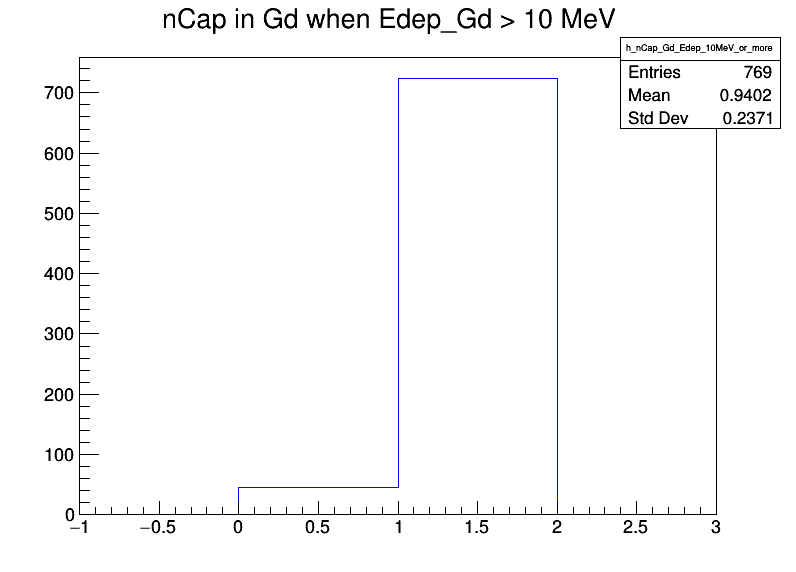

In [37]:
#%jsroot on
h_nCap_Gd_Edep_10MeV_or_more.Draw()
h_nCap_Gd_Edep_10MeV_or_more.SetLineColor(rt.kBlue)
rt.gPad.SetLogy(0)
c.Draw()

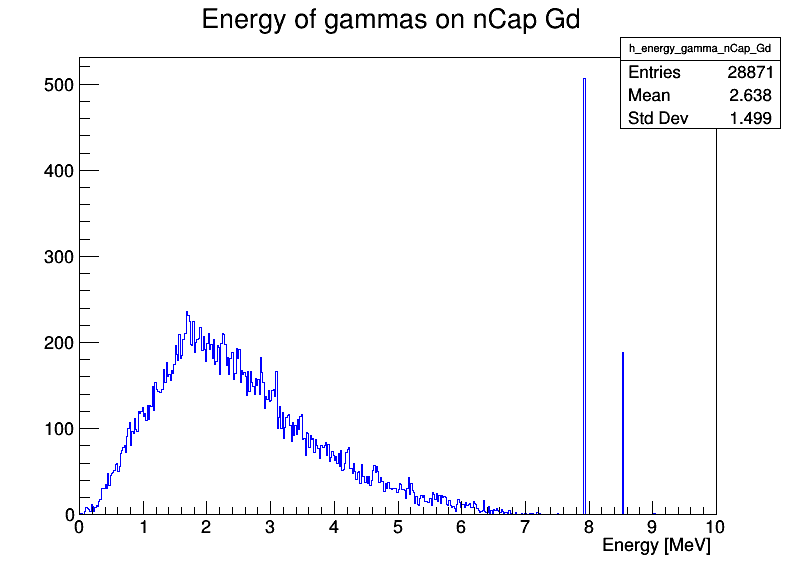

In [38]:
h_energy_gamma_nCap_Gd.Draw()
rt.gPad.SetLogy(0)
h_energy_gamma_nCap_Gd.SetLineColor(rt.kBlue)

c.Draw()
if(save_):
    c.SaveAs("./background_study/Gd/h_energy_gamma_nCap_Gd.png")

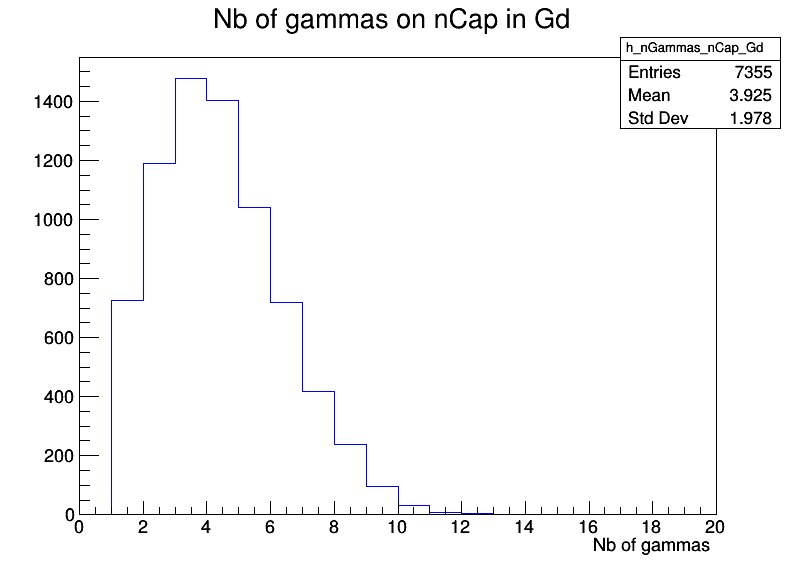

In [39]:
h_nGammas_nCap_Gd.Draw()
h_nGammas_nCap_Gd.SetLineColor(rt.kBlue)

c.Draw()
if(save_):
    c.SaveAs("./background_study/Gd/h_nGammas_nCap_Gd.png")

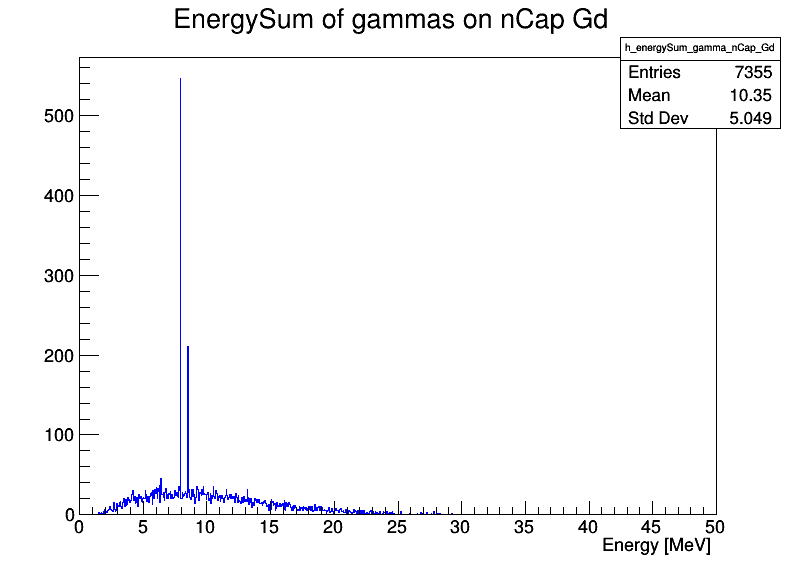

In [42]:
h_energySum_gamma_nCap_Gd.Draw()
rt.gPad.SetLogy(0)
h_energySum_gamma_nCap_Gd.SetLineColor(rt.kBlue)

c.Draw()
if(save_):
    c.SaveAs("./background_study/Gd/h_energySum_gamma_nCap_Gd.png")

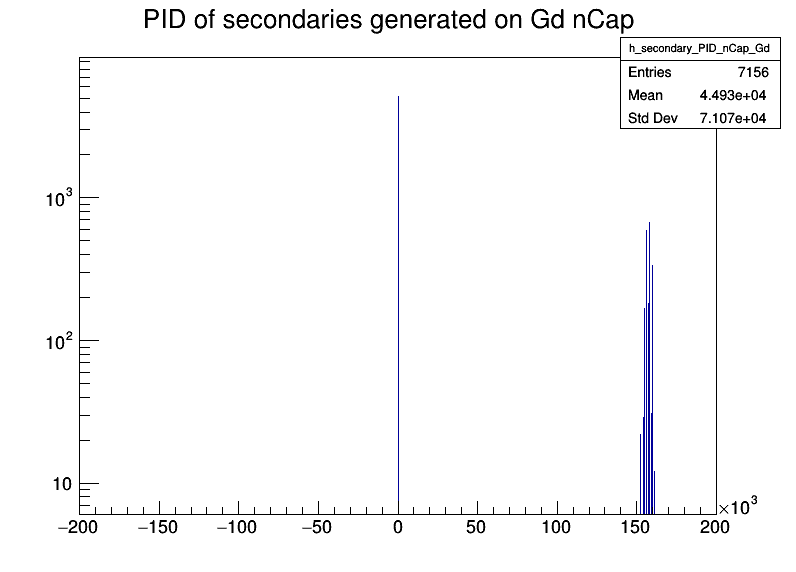

In [23]:
h_secondary_PID_nCap_Gd.Draw()
rt.gPad.SetLogy()
c.Draw()

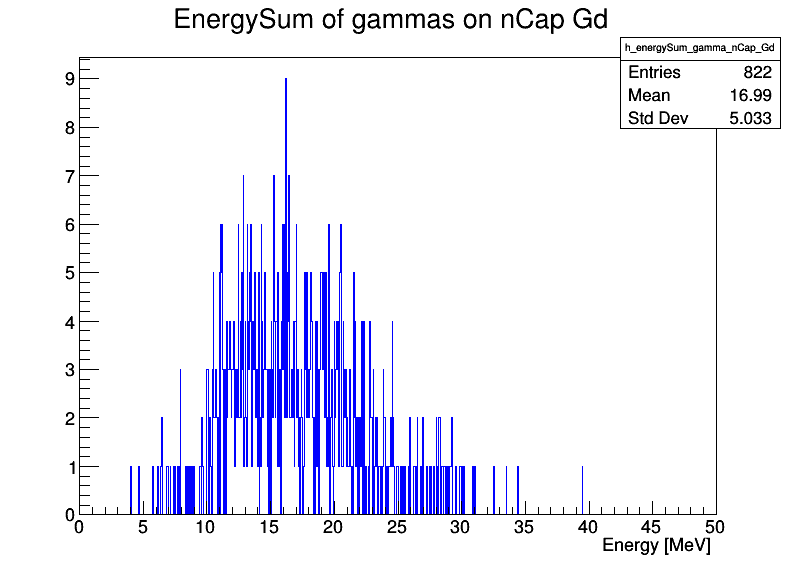

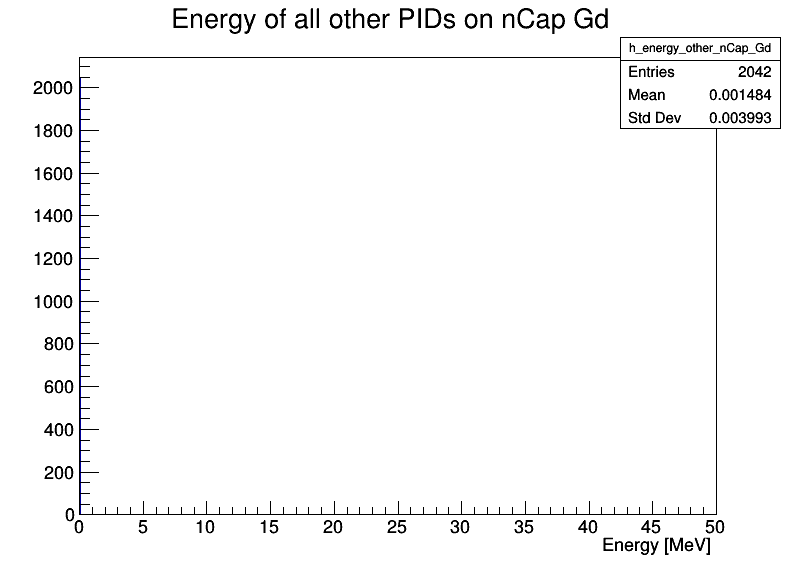

In [28]:
h_energy_other_nCap_Gd.Draw()
c.Draw()

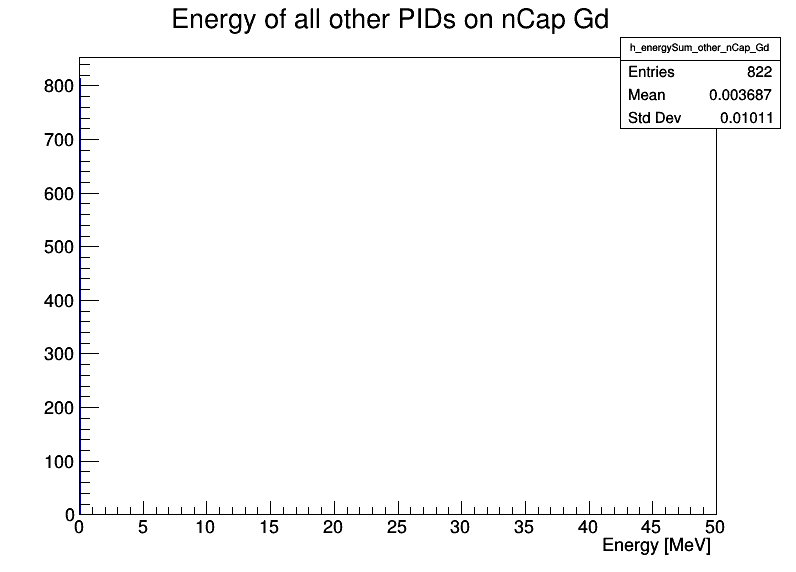

In [29]:
h_energySum_other_nCap_Gd.Draw()
c.Draw()

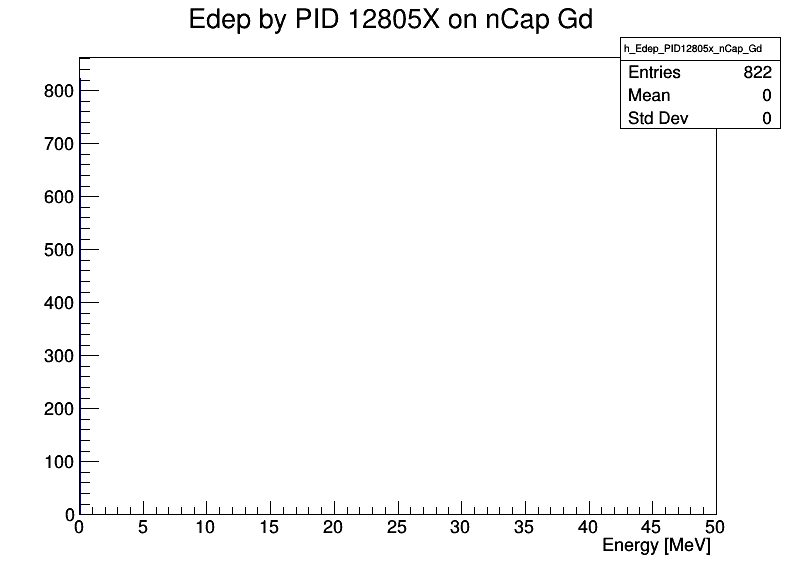

In [30]:
h_Edep_PID12805x_nCap_Gd.Draw()
c.Draw()

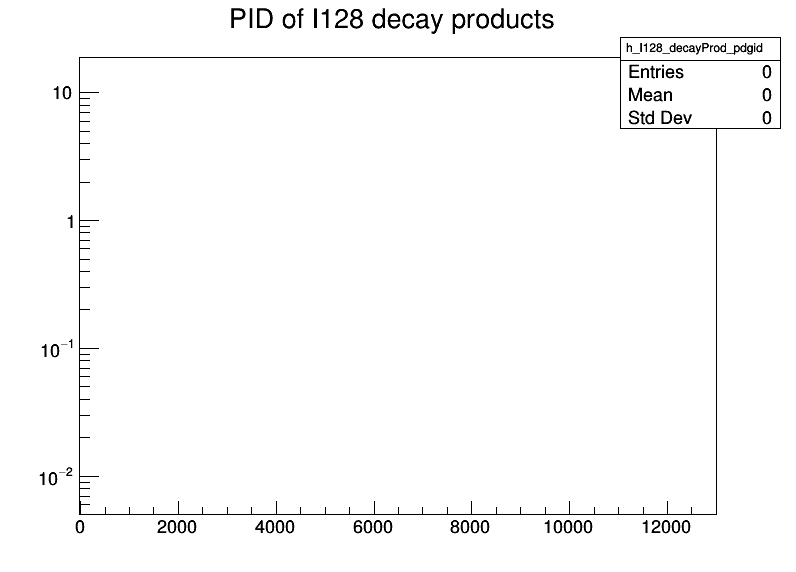

In [31]:
h_I128_decayProd_pdgid.Draw()
rt.gPad.SetLogy(1)
c.Draw()

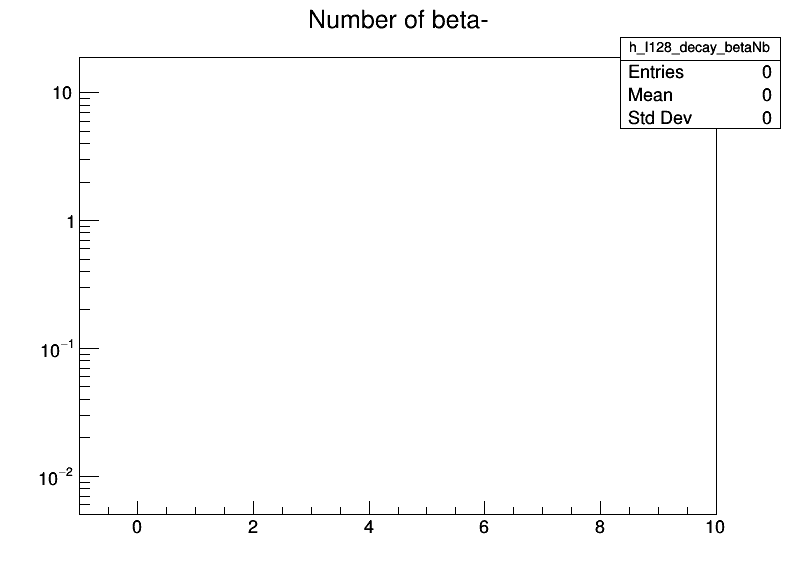

In [32]:
h_I128_decay_betaNb.Draw()
c.Draw()

In [ ]:
h_I128_decay_betaEn.Draw()
rt.gPad.SetLogy(1)
c.Draw()

In [ ]:
h_I128_decay_NuEn.Draw()
rt.gPad.SetLogy(1)
c.Draw()

In [ ]:
h_I128_decay_gammaEn.Draw()
c.Draw()

# Geometry debug

In [ ]:

h_neutron_x_y_z_Gd_horizontal = rt.TH3F("h_neutron_x_y_z_Gd_horizontal","Hit Position in bottom array",900,-500,400,800,-400,400,1600,-800.0, 800.0)
h_neutron_x_y_z_Gd_horizontal.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_z_Gd_horizontal.GetYaxis().SetTitle("y [mm]")
h_neutron_x_y_z_Gd_horizontal.GetYaxis().SetTitle("z [mm]")

h_neutron_x_y_z_Gd_vertical = rt.TH3F("h_neutron_x_y_z_Gd_vertical","Hit Position in vertical array",900,-500,400,800,-400,400,1600,-800.0, 800.0)
h_neutron_x_y_z_Gd_vertical.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_z_Gd_vertical.GetYaxis().SetTitle("y [mm]")
h_neutron_x_y_z_Gd_vertical.GetYaxis().SetTitle("z [mm]")

h_neutron_x_y_z_Si = rt.TH3F("h_neutron_x_y_z_Si","Hit Position in Si",900,-500,400,800,-400,400,1600,-800.0, 800.0)
h_neutron_x_y_z_Si.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_z_Si.GetYaxis().SetTitle("y [mm]")
h_neutron_x_y_z_Si.GetYaxis().SetTitle("z [mm]")

# h_neutron_x_y_z_nCap = rt.TH3F("h_neutron_x_y_z_nCap","Position of neutron captures registered in Si crystal",120,-60,60,120,-60,60,60,10.0, 70.0)
# h_neutron_x_y_z_nCap.GetXaxis().SetTitle("x [mm]")
# h_neutron_x_y_z_nCap.GetYaxis().SetTitle("y [mm]")
# h_neutron_x_y_z_nCap.GetYaxis().SetTitle("z [mm]")

total_capture_events = 0
capture_in_si = 0
capture_in_Gd = 0
events_with_no_neutron = []
events_with_neutron = []
events_with_nCap_in_Gd = []
events_with_nCap_in_Si = []
debug_count = 0
last = -1
for i in tqdm(range(len(EV))):
    if(i > 10000):
        break
    if(debug_count > 10):
        break
    for j in range(len(DT[i])):
        if(DT[i][j] == 2001 and (X1[i][j] > -250.0) and i != last):
            print ("entry : X1 : Y1 : Z1 :: %d : %f : %f : %f"%(i,X1[i][j],Y1[i][j],Z1[i][j]))
            debug_count += 1
            last = i
            
        if(DT[i][j] == 2001):
            h_neutron_x_y_z_Gd_vertical.Fill(X1[i][j],Y1[i][j],Z1[i][j])
        elif(DT[i][j] >= 1001 and DT[i][j] <= 1003):
            h_neutron_x_y_z_Gd_horizontal.Fill(X1[i][j],Y1[i][j],Z1[i][j])
        elif(DT[i][j] == 1):
            h_neutron_x_y_z_Si.Fill(X1[i][j],Y1[i][j],Z1[i][j])
    

In [ ]:
i = 32
total_D3 = 0.0
print("i : Type : TS : P : X1 : Y1 : Z1 : DT : X3 : Y3: Z3 : E1 : D3 : GT : nCap")
for j in range(len(TS[i])):
    if(D3[i][j] > 0 or True):
        print("%d : %d : %d : %d : %0.2f : %0.2f : %0.2f : %d : %0.2f : %0.2f : %0.2f : %0.3f : %0.3f : %d : %d"%(j,Type[i][j],TS[i][j],P[i][j],X1[i][j],Y1[i][j],Z1[i][j],DT[i][j],X3[i][j],Y3[i][j],Z3[i][j], E1[i][j],D3[i][j],time3[i][j],nCap[i][j]))
        total_D3 += D3[i][j]


   
tracks = TS[i]/100000
tracks = tracks.astype('int32')
neutron_tracks = tracks[Type[i] == 2112]
neutron_parents = P[i][Type[i] == 2112]
#neutron_tracks = neutron_tracks[neutron_parents == 0]
neutron_energy = E1[i][Type[i] == 2112]
neutron_DT = DT[i][Type[i] == 2112]

neutron_X1 = X1[i][Type[i] == 2112]
neutron_Y1 = Y1[i][Type[i] == 2112]
neutron_Z1 = Z1[i][Type[i] == 2112]
neutron_capture = nCap[i][Type[i] == 2112]

unique_tracks, indices = np.unique(neutron_tracks, return_index=True)

neutron_energy = neutron_energy[indices]
neutron_X1 = neutron_X1[indices]
neutron_Y1 = neutron_Y1[indices]
neutron_Z1 = neutron_Z1[indices]
neutron_capture = neutron_capture[indices]

print(Type[i])
print(P[i])
print(D3[i])
print(neutron_capture)
print(neutron_energy)
print("Total energy deposit = %f"%(total_D3))

In [ ]:
gaus_parent = rt.TH1F("gaus_parent","gaus_parent",1000,0,10)
uniform_dis = rt.TH1F("uniform_dis","uniform_dis",1000,-2,2)
chan1 = rt.TH1F("chan1","channel 1",1000,0,10)
chan2 = rt.TH1F("chan2","channel 2",1000,0,10)
chan_total = rt.TH1F("chan_total","channel - total",1000,0,10)
rand = rt.TRandom3()
for i in range(100000):
    G = rand.Gaus(5,0.5)
    U = rand.Uniform()
    c1 = G*U
    c2 = G*(1.0-U)
    gaus_parent.Fill(G)
    uniform_dis.Fill(U)
    chan1.Fill(c1)
    chan2.Fill(c2)
    chan_total.Fill(c1+c2)


In [ ]:
gaus_parent.Draw()
c.Draw()

In [ ]:
uniform_dis.Draw()
c.Draw()

In [ ]:
chan1.Draw()
c.Draw()

In [ ]:
chan1.Draw()
c.Draw()

In [ ]:
chan_total.Draw()
c.Draw()